In [21]:
import pandas as pd
df = pd.read_csv('/Users/nickhausman/Desktop/DATA/P2/home-credit-default-risk/application_train.csv')
df.head()
for col in df.columns:
    if 'MODE' in col or 'AVG' in col:
        df = df.drop(col, axis=1)

In [22]:
corr = df.corr().abs()

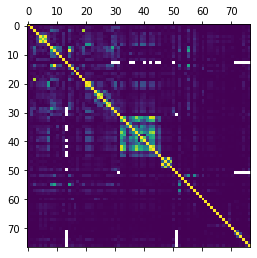

In [23]:
import matplotlib.pyplot as plt

plt.matshow(df.corr().abs())
plt.show()

In [24]:
desc = pd.read_csv('/Users/nickhausman/Desktop/DATA/P2/home-credit-default-risk/HomeCredit_columns_description.csv', encoding = "ISO-8859-1")

In [25]:
desc['Description'][1]

'Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)'

In [26]:
corr.columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI',
       'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI',
       'NONLIVIN

In [27]:
with open('highcorrs.txt', 'w') as f:
    for index, row in corr.iteritems():
        for col in corr.columns:
            if row[col]  > 0.8 and index != col:
                f.write(str(col))
                f.write('\n')
                f.write(str(list(desc[desc['Row'] == col]['Description'])[0]))
                f.write('\n')
                f.write(str(index))
                f.write('\n')
                f.write(str(list(desc[desc['Row'] == index]['Description'])[0]))
                f.write('\n')
                f.write(str(row[col]))
                f.write('\n')
                f.write('\n')
    bad_corr_choice_drops = ['AMT_GOODS_PRICE', 'CNT_CHILDREN', 'FLAG_EMP_PHONE', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_WORK_REGION', 'LIVE_CITY_NOT_WORK_CITY', 'LIVINGAPARTMENTS_MEDI', 'ELEVATORS_MEDI', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'LIVINGAREA_MEDI']
    f.write(str(bad_corr_choice_drops))
    f.write('\n')

In [28]:
df = df.drop(bad_corr_choice_drops, axis=1)
corr = df.corr().abs()
len(df.columns)

78

In [29]:
df.to_csv('noncorrelated_train.csv')
corr.to_csv('corrs_after.csv')

In [ ]:
import matplotlib.pyplot as plt

plt.matshow(df.corr().abs())
plt.show()